# 현대모비스 주가를 ARIMA로 예측해보아요~

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas import to_datetime
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats
mobis_df = yf.download('012330.KS', start='2022-01-01', end='2023-06-02', progress=False)
mobis_df = mobis_df[['Close']]
mobis_df = mobis_df.reset_index()
mobis_df.columns = ['day', 'price']
mobis_df['day'] = pd.to_datetime(mobis_df['day'])
mobis_df.index = mobis_df['day']
mobis_df.set_index('day', inplace=True)

mobis_df

,price
day,
2022-01-04,255500.0
2022-01-05,257000.0
2022-01-06,269500.0
2022-01-07,269500.0
2022-01-10,262000.0
...,...
2023-05-25,227000.0
2023-05-26,227000.0
2023-05-30,223500.0


train 80% test 20%를 위해  
338, 68로

In [ ]:
mobis_train_df = mobis_df[:270]
mobis_train_df

,price
day,
2022-01-04,255500.0
2022-01-05,257000.0
2022-01-06,269500.0
2022-01-07,269500.0
2022-01-10,262000.0
...,...
2023-02-02,206000.0
2023-02-03,208500.0
2023-02-06,206000.0


In [ ]:
mobis_test_df = mobis_df[270:]
mobis_test_df

,price
day,
2023-02-09,207500.0
2023-02-10,208000.0
2023-02-13,207500.0
2023-02-14,213000.0
2023-02-15,211500.0
...,...
2023-05-25,227000.0
2023-05-26,227000.0
2023-05-30,223500.0


In [ ]:
import matplotlib.font_manager as fm
!apt-get install fonts-nanum*

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20180306-3).
fonts-nanum-coding is already the newest version (2.5-2).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


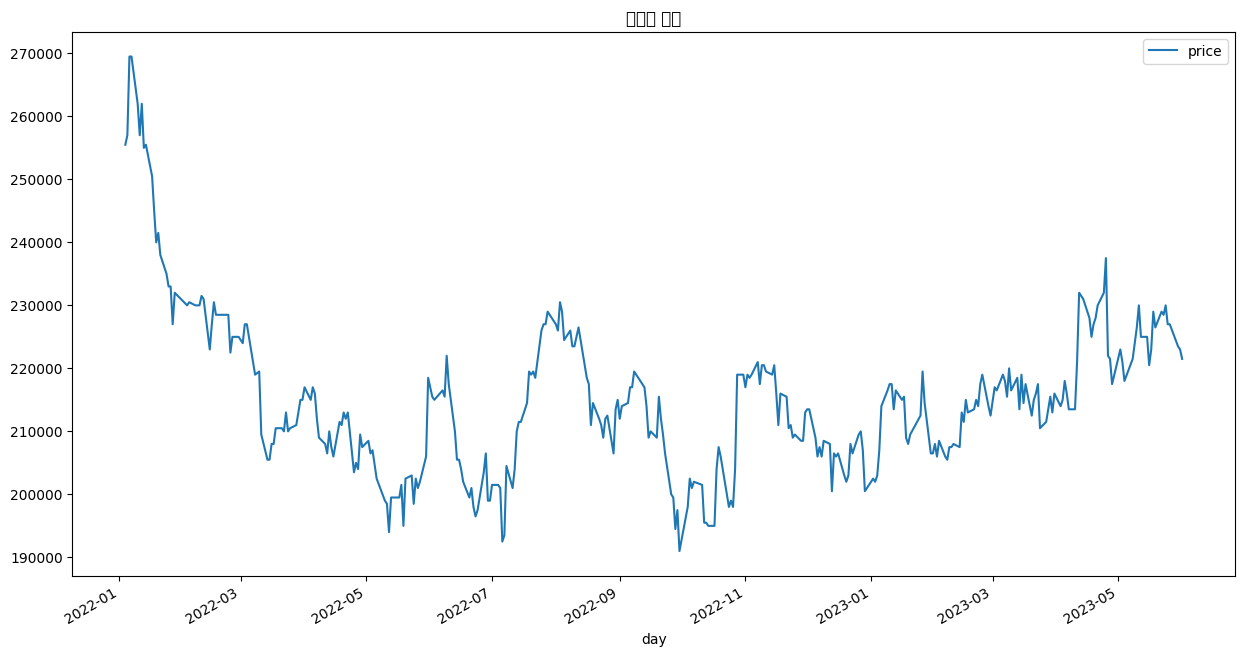

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
mobis_df.plot(ax=ax)
plt.title("모비스 주가")
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore')
plt.show()

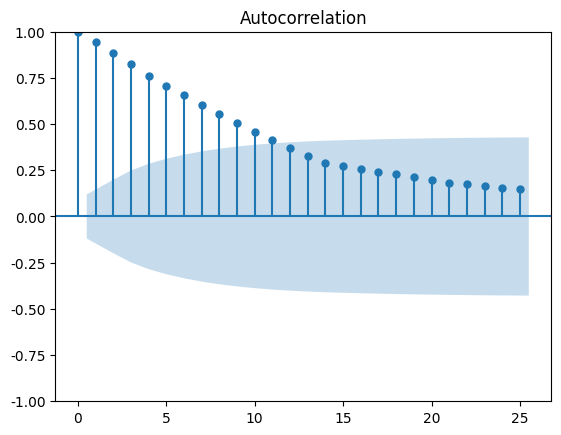

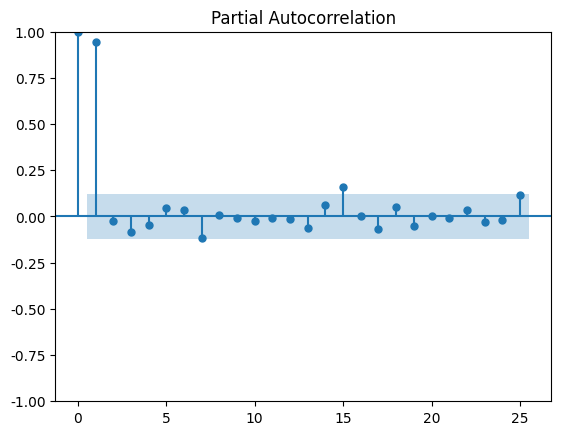

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(mobis_train_df)
plot_pacf(mobis_train_df)
plt.show()

0 0 1 가능성이 있으나 차분도 진행

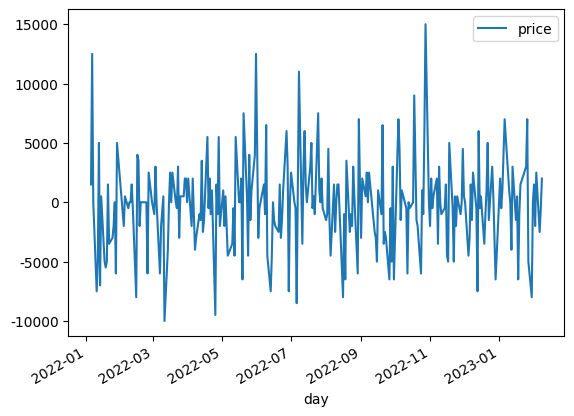

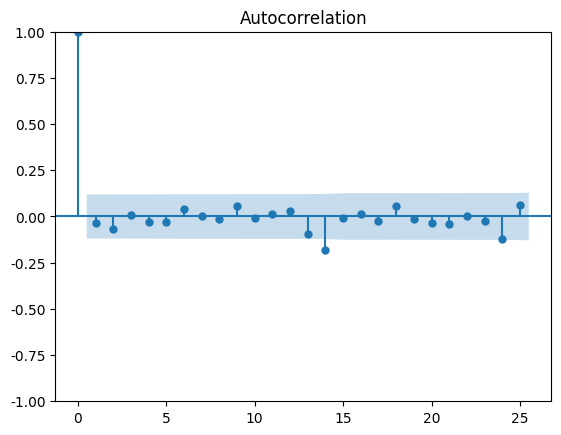

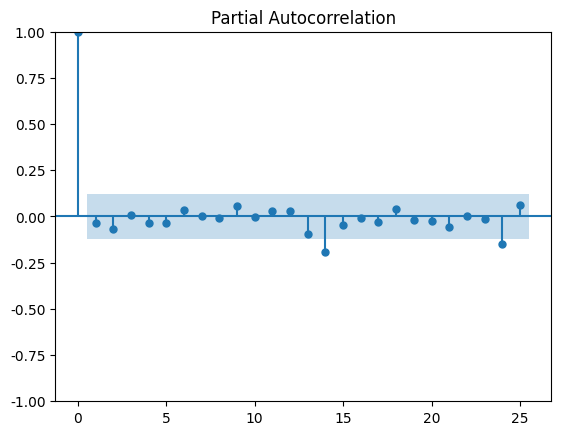

In [ ]:
diff_1 = mobis_train_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

0 0 1로 확

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(mobis_train_df, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  270
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2608.227
Date:                Tue, 06 Jun 2023   AIC                           5222.454
Time:                        09:08:37   BIC                           5233.249
Sample:                             0   HQIC                          5226.789
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.139e+05   6493.427     32.943      0.000    2.01e+05    2.27e+05
ar.L1          0.9726      0.010     95.131      0.000       0.953       0.993
sigma2      1.378e+07      9.005   1.53e+06      0.0

In [ ]:
preds = model_fit.predict(0,7, typ='levels')
preds = preds.reset_index()
preds.columns = ['date', 'americano']
preds['date']=['2023-06-02','2023-06-03','2023-06-04','2023-06-05','2023-06-07','2023-06-08', '2023-06-09', '2023-06-10']
preds['date'] = pd.to_datetime(preds['date'])
preds.index = preds['date']
preds.set_index('date', inplace=True)

In [ ]:
preds

,americano
date,
2023-06-02,213911.111518
2023-06-03,254359.720719
2023-06-04,255818.593895
2023-06-05,267975.870357
2023-06-07,267975.870357
2023-06-08,260681.504480
2023-06-09,255818.593895
2023-06-10,260681.504480


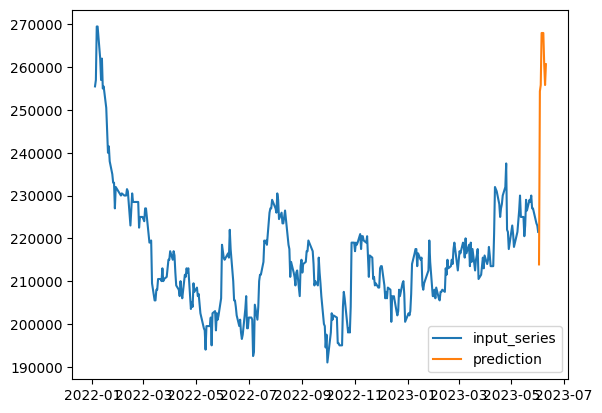

In [ ]:
plt.plot(mobis_df, label="input_series")
plt.plot(preds, label='prediction')
plt.legend()